In [1]:
pwd

'/mmfs1/data/aglinska/BC-MRI-AE/Colab Notebooks'

In [83]:
import numpy as np
import pickle
import pandas as pd
from matplotlib import  pyplot as plt
import  seaborn as sns
from helper_funcs import *

from tqdm import tqdm_notebook as tqdm
from datetime import datetime

In [78]:
df = pd.read_csv('../Data/ABIDE_legend_S982.csv')
df.head()

,Unnamed: 0,index,BIDS_ID,Anonymized ID,Subject Type,Visit,Days since enrollment,SubID,DxGroup,DSMIVTR,...,WISC4 Sym Scaled,Age at MPRAGE,Current Med Status,Medication Name,Medication Name.1,Off stimulants at EPI scan?,ScanSite,ScannerType,ScannerID,ScanSiteID
0,0,0,sub-001,A00033348,PATIENT,session_1,8,51320,1,2.0,...,NaN,NaN,0.0,NaN,NaN,NaN,mpg,verio,7,3
1,1,1,sub-002,A00033398,CONTROL,session_1,8,51373,2,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,mpg,verio,7,3
2,2,2,sub-003,A00033352,PATIENT,session_1,8,51324,1,2.0,...,NaN,NaN,0.0,NaN,NaN,NaN,mpg,verio,7,3
3,3,3,sub-004,A00033389,CONTROL,session_1,8,51364,2,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,mpg,verio,7,3
4,4,4,sub-005,A00033354,PATIENT,session_1,8,51326,1,2.0,...,NaN,NaN,0.0,NaN,NaN,NaN,mpg,verio,7,3


In [79]:
subs = np.load('../Data/ABIDE-subs-982.npz')['subs']

In [80]:
assert len(subs)==len(df), 'diff lenghts'
assert all([subs[s]==df['BIDS_ID'].values[s] for s in range(len(df))]), 'bad order'

In [154]:
patients = df['DxGroup'].values==1

In [5]:
fn = '../Data/embedded_data.pickle'
data = pickle.load(open(fn,'rb'))

In [88]:
np.array(list(data.keys()))

array(['embedding_bg', 'embedding_sl', 'embedding_vae',
       'sfari_embedding_vae', 'sfari_embedding_bg', 'sfari_embedding_sl',
       'bg_space_abide', 'sl_space_abide', 'vae_space_abide',
       'bg_space_sfari', 'sl_space_sfari', 'vae_space_sfari',
       'bg_Sspace_sfari', 'sl_Sspace_sfari', 'vae_Sspace_sfari',
       'reducer_bg_abide', 'reducer_sl_abide', 'reducer_vae_abide',
       'reducer_bg_sfari', 'reducer_sl_sfari', 'reducer_vae_sfari'],
      dtype='<U19')

In [84]:
for key in data.keys():
    try:
        print(f'{key} | {data[key].shape}')
    except:
        pass

embedding_bg | (470, 16)
embedding_sl | (470, 16)
embedding_vae | (470, 32)
sfari_embedding_vae | (51, 32)
sfari_embedding_bg | (51, 16)
sfari_embedding_sl | (51, 16)
bg_space_abide | (470, 2)
sl_space_abide | (470, 2)
vae_space_abide | (470, 2)
bg_space_sfari | (51, 2)
sl_space_sfari | (51, 2)
vae_space_sfari | (51, 2)
bg_Sspace_sfari | (51, 2)
sl_Sspace_sfari | (51, 2)
vae_Sspace_sfari | (51, 2)


In [129]:
#data_latent = np.load('../Data/latent_vecs100.npz')
data_latent = np.load('../Data/latent_vecs2.npz')
list(data_latent.keys())
print(data_latent['salient_vec_abide'].shape)

(10, 982, 16)


In [90]:
data_latent['salient_vec_abide'][0,:,:]

array([[-0.680375  ,  0.6978164 , -2.5040772 , ..., -0.98086977,
        -0.02749885, -1.1932344 ],
       [-1.5385598 , -0.97122633, -1.5036471 , ...,  0.02578875,
         0.10827899,  0.45019603],
       [-2.1339648 ,  1.5483809 ,  0.16209564, ..., -0.0806436 ,
        -0.37684837, -0.919783  ],
       ...,
       [ 0.29469293, -0.03628629, -0.02468632, ...,  1.9105862 ,
        -0.5432118 , -0.81352866],
       [-1.1789684 , -0.06843533, -0.69884986, ..., -1.0629838 ,
         0.23091573, -2.609104  ],
       [-1.9176862 , -0.3217874 , -1.1331882 , ...,  1.1966307 ,
         0.22267357, -0.81284344]], dtype=float32)

In [155]:
now = datetime.now
t0 = now()
print(t0)

2021-08-24 12:55:07.761908


In [159]:
%%capture
n = 10 
umap_mat = np.zeros((n,470,2))
for i in tqdm(range(n)):
    umap_mat[i,:,:] = data['reducer_sl_abide'].transform(data_latent['salient_vec_abide'][i,patients,:])

In [160]:
print(now())
print(now()-t0)

2021-08-24 12:55:45.982487
0:00:38.220674


In [161]:
umap_mat.shape

(10, 470, 2)

<ErrorbarContainer object of 3 artists>

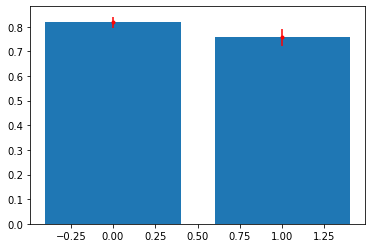

In [162]:
y = [get_triu(np.corrcoef(umap_mat[:,:,0])).mean(),get_triu(np.corrcoef(umap_mat[:,:,1])).mean()]
se = [get_triu(np.corrcoef(umap_mat[:,:,0])).std(),get_triu(np.corrcoef(umap_mat[:,:,1])).std()]
plt.bar([0,1],y)
plt.errorbar([0,1],y,se,fmt='r.')

In [251]:
def plot_error_bar(y,xlbls=None,title=None):
    #y = [r_x,r_y]
    xs = np.arange(len(y))
    m = [val.mean() for val in y]
    se = [val.std() for val in y]

    plt.bar(xs,m)
    plt.errorbar(xs,m,se,fmt='r.')
    if xlbls:
        plt.xticks(xs,labels=xlbls)
    if title:
        plt.title(title,fontsize=12)

False

In [306]:
def plot_scatters(x,ys):
    plt.figure(figsize=np.array((10,5))*.85)
    plt.subplot(1,2,1)
    #x = vec[v]
    #y = umap_mat[i,v,0]
    #print(x.shape)
    #print(ys[0].shape)
    plt.scatter(x,ys[0])

    m,b = np.polyfit(x, ys[0], 1)
    plt.plot(x,m*x+b,'r-',linewidth=3)

    plt.subplot(1,2,2)
    #x,y = vec[v],umap_mat[i,v,1]
    plt.scatter(x,ys[1])

    m,b = np.polyfit(x, ys[1], 1)
    plt.plot(x,m*x+b,'r-',linewidth=3)

In [323]:
stats.ttest_rel(abs(r_x),abs(r_y))

Ttest_relResult(statistic=-0.5007790810909151, pvalue=0.6285441963831087)

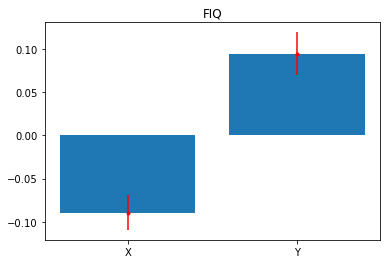

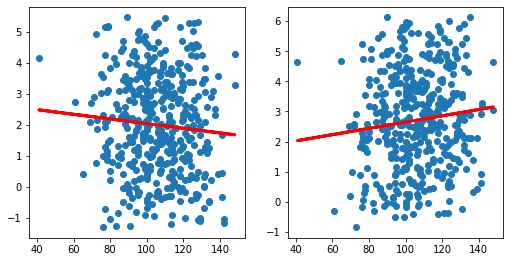

In [318]:
key = 'FIQ'
vec = df[key].values[patients]
v = ~np.isnan(vec)
r_x = np.array([np.corrcoef(vec[v],umap_mat[i,v,0])[0,1] for i in range(n)])
r_y = np.array([np.corrcoef(vec[v],umap_mat[i,v,1])[0,1] for i in range(n)])
plot_error_bar([r_x,r_y],xlbls=['X','Y'],title=key)
plot_scatters(vec[v],[umap_mat[i,v,0],umap_mat[i,v,1]])

In [231]:
import scipy.stats as stats

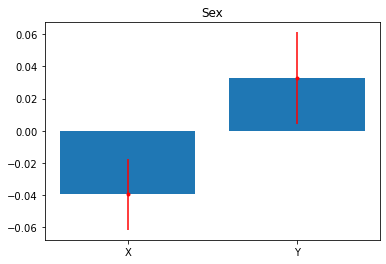

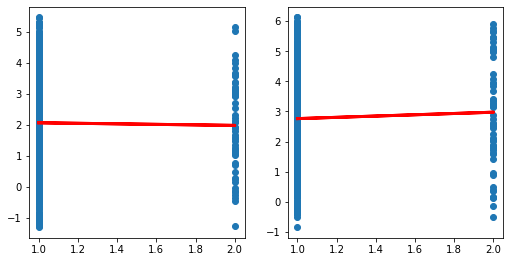

In [308]:
key = 'Sex'
vec = df[key].values[patients]
v = ~np.isnan(vec)
r_x = np.array([np.corrcoef(vec[v],umap_mat[i,v,0])[0,1] for i in range(n)])
r_y = np.array([np.corrcoef(vec[v],umap_mat[i,v,1])[0,1] for i in range(n)])
plot_error_bar([r_x,r_y],xlbls=['X','Y'],title=key)
plot_scatters(vec[v],[umap_mat[i,v,0],umap_mat[i,v,1]])

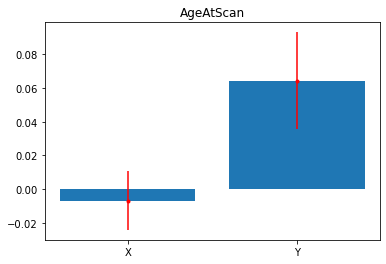

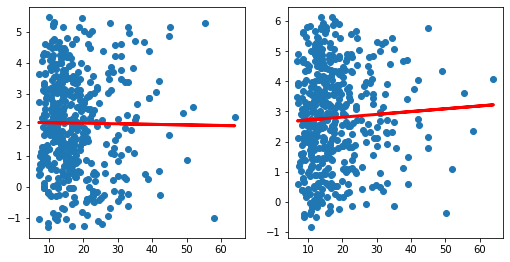

In [309]:
key = 'AgeAtScan'
vec = df[key].values[patients]
v = ~np.isnan(vec)
r_x = np.array([np.corrcoef(vec[v],umap_mat[i,v,0])[0,1] for i in range(n)])
r_y = np.array([np.corrcoef(vec[v],umap_mat[i,v,1])[0,1] for i in range(n)])
plot_error_bar([r_x,r_y],xlbls=['X','Y'],title=key)
plot_scatters(vec[v],[umap_mat[i,v,0],umap_mat[i,v,1]])

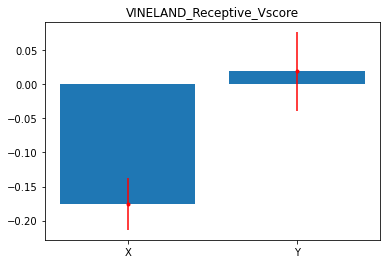

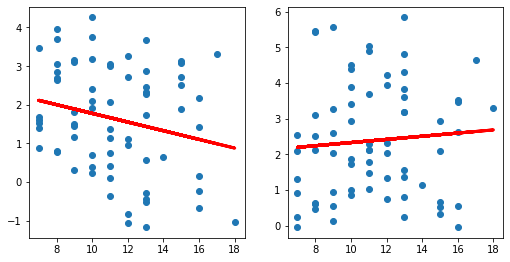

In [310]:
key = 'VINELAND_Receptive_Vscore'
vec = df[key].values[patients]
v = ~np.isnan(vec)
r_x = np.array([np.corrcoef(vec[v],umap_mat[i,v,0])[0,1] for i in range(n)])
r_y = np.array([np.corrcoef(vec[v],umap_mat[i,v,1])[0,1] for i in range(n)])
plot_error_bar([r_x,r_y],xlbls=['X','Y'],title=key)
plot_scatters(vec[v],[umap_mat[i,v,0],umap_mat[i,v,1]])

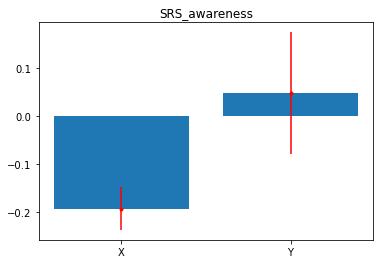

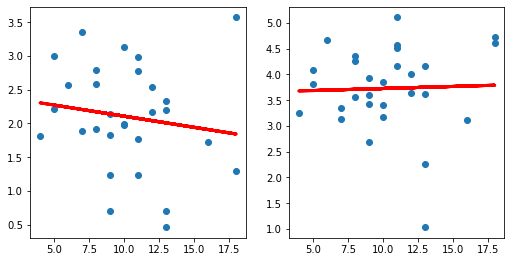

In [311]:
key = 'SRS_awareness'
vec = df[key].values[patients]
v = ~np.isnan(vec)
r_x = np.array([np.corrcoef(vec[v],umap_mat[i,v,0])[0,1] for i in range(n)])
r_y = np.array([np.corrcoef(vec[v],umap_mat[i,v,1])[0,1] for i in range(n)])
plot_error_bar([r_x,r_y],xlbls=['X','Y'],title=key)
plot_scatters(vec[v],[umap_mat[i,v,0],umap_mat[i,v,1]])

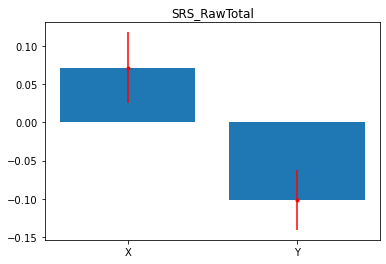

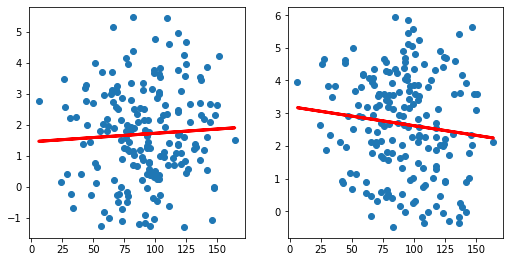

In [312]:
key = 'SRS_RawTotal'
vec = df[key].values[patients]
v = ~np.isnan(vec)
r_x = np.array([np.corrcoef(vec[v],umap_mat[i,v,0])[0,1] for i in range(n)])
r_y = np.array([np.corrcoef(vec[v],umap_mat[i,v,1])[0,1] for i in range(n)])
plot_error_bar([r_x,r_y],xlbls=['X','Y'],title=key)
plot_scatters(vec[v],[umap_mat[i,v,0],umap_mat[i,v,1]])

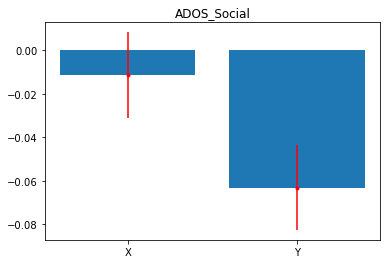

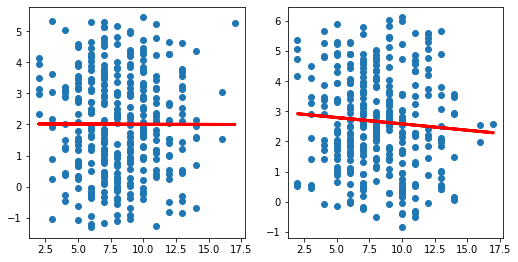

In [313]:
key = 'ADOS_Social'
vec = df[key].values[patients]
v = ~np.isnan(vec)
r_x = np.array([np.corrcoef(vec[v],umap_mat[i,v,0])[0,1] for i in range(n)])
r_y = np.array([np.corrcoef(vec[v],umap_mat[i,v,1])[0,1] for i in range(n)])
plot_error_bar([r_x,r_y],xlbls=['X','Y'],title=key)
plot_scatters(vec[v],[umap_mat[i,v,0],umap_mat[i,v,1]])

In [225]:
# plt.scatter(vec[v],umap_mat[i,v,1])
# m, b = np.polyfit(vec[v],umap_mat[i,v,1],1)
# plt.plot(vec[v], m*vec[v] + b,'r-')

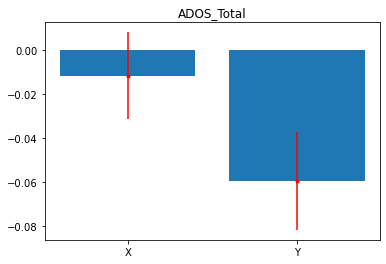

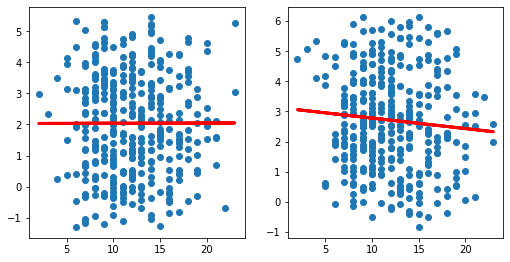

In [314]:
key = 'ADOS_Total'
vec = df[key].values[patients]
v = ~np.isnan(vec)
r_x = np.array([np.corrcoef(vec[v],umap_mat[i,v,0])[0,1] for i in range(n)])
r_y = np.array([np.corrcoef(vec[v],umap_mat[i,v,1])[0,1] for i in range(n)])
plot_error_bar([r_x,r_y],xlbls=['X','Y'],title=key)
plot_scatters(vec[v],[umap_mat[i,v,0],umap_mat[i,v,1]])